<a href="https://colab.research.google.com/github/Jsadain/Capstone_CIND820/blob/main/Another_copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
PATH = 'https://raw.githubusercontent.com/Jsadain/Capstone_CIND820/main/loan_sanction_train.csv'
df = pd.read_csv(PATH)

In [86]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
#describing statistics for the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Loan_Status', ylabel='count'>

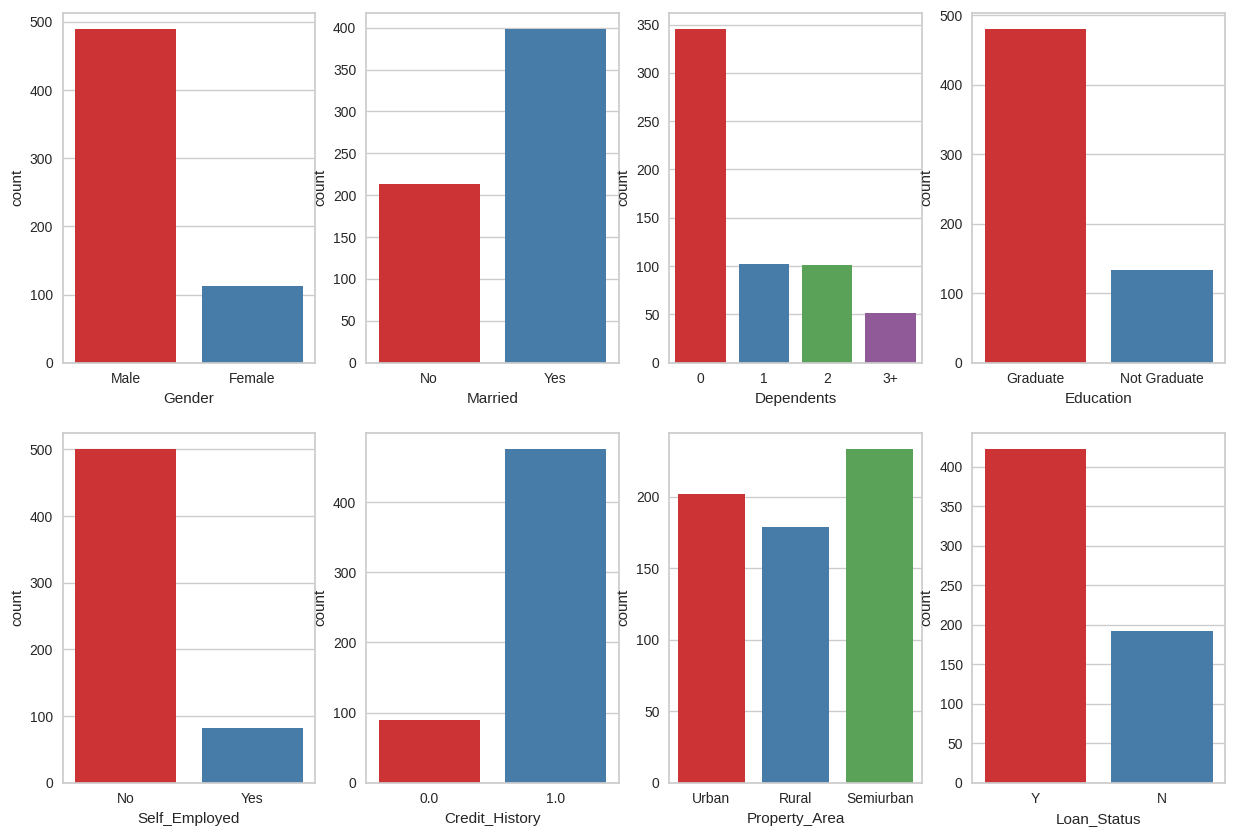

In [88]:
#univariate analysis and visualizations for categorical variables

plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
sns.countplot(x = 'Gender', palette = 'Set1', data = df)
plt.subplot(2,4,2)
sns.countplot(x = 'Married', palette = 'Set1', data = df)
plt.subplot(2,4,3)
sns.countplot(x = 'Dependents', palette = 'Set1', data = df)
plt.subplot(2,4,4)
sns.countplot(x = 'Education', palette = 'Set1', data = df)
plt.subplot(2,4,5)
sns.countplot(x = 'Self_Employed', palette = 'Set1', data = df)
plt.subplot(2,4,6)
sns.countplot(x = 'Credit_History', palette = 'Set1', data = df)
plt.subplot(2,4,7)
sns.countplot(x = 'Property_Area', palette = 'Set1', data = df)
plt.subplot(2,4,8)
sns.countplot(x = 'Loan_Status', palette = 'Set1', data = df)

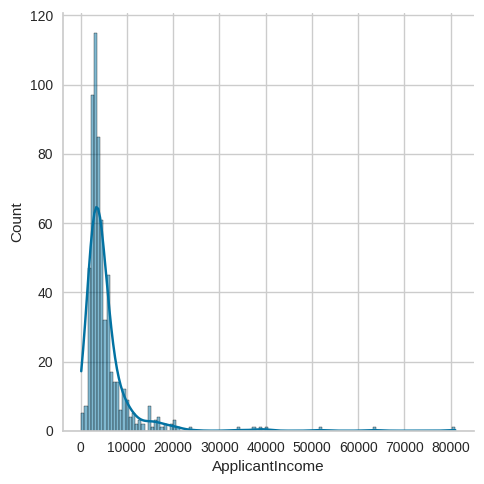

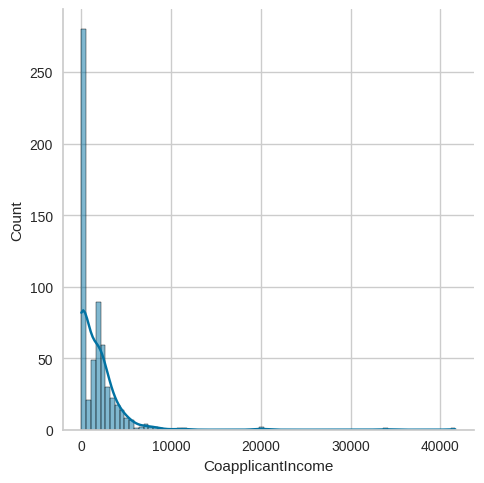

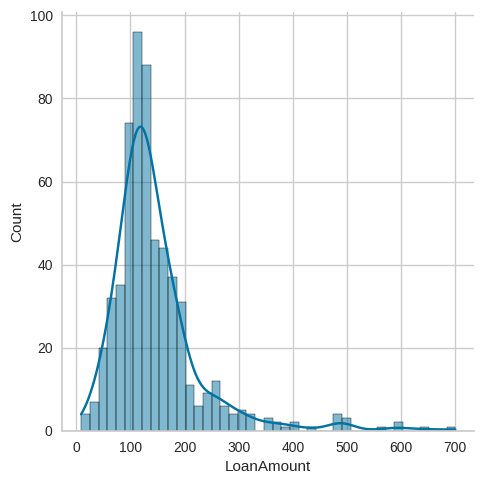

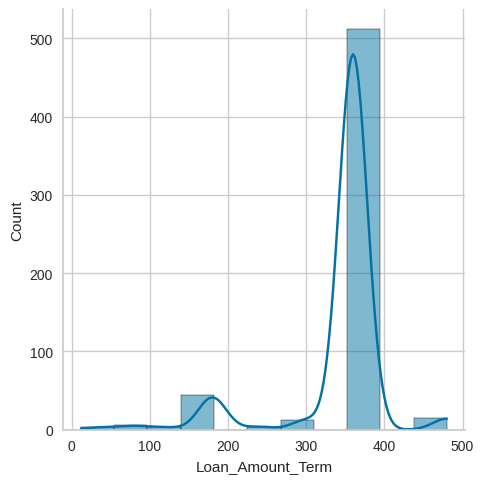

In [89]:
#univariate analysis of numerical variables.

sns.displot(df['ApplicantIncome'], kind="hist",kde="TRUE")
sns.displot(df['CoapplicantIncome'], kind="hist",kde="TRUE")
sns.displot(df['LoanAmount'], kind= "hist", kde="TRUE")
sns.displot(df['Loan_Amount_Term'], kind="hist",kde="TRUE")

#here we can see that none of our numerical attribute is normally distributed so we cannot use the Z-score method for outliers. infact three of them are right skewed and loan_amount_term is negative skewed so we will use the IQR method to treat with outliers.

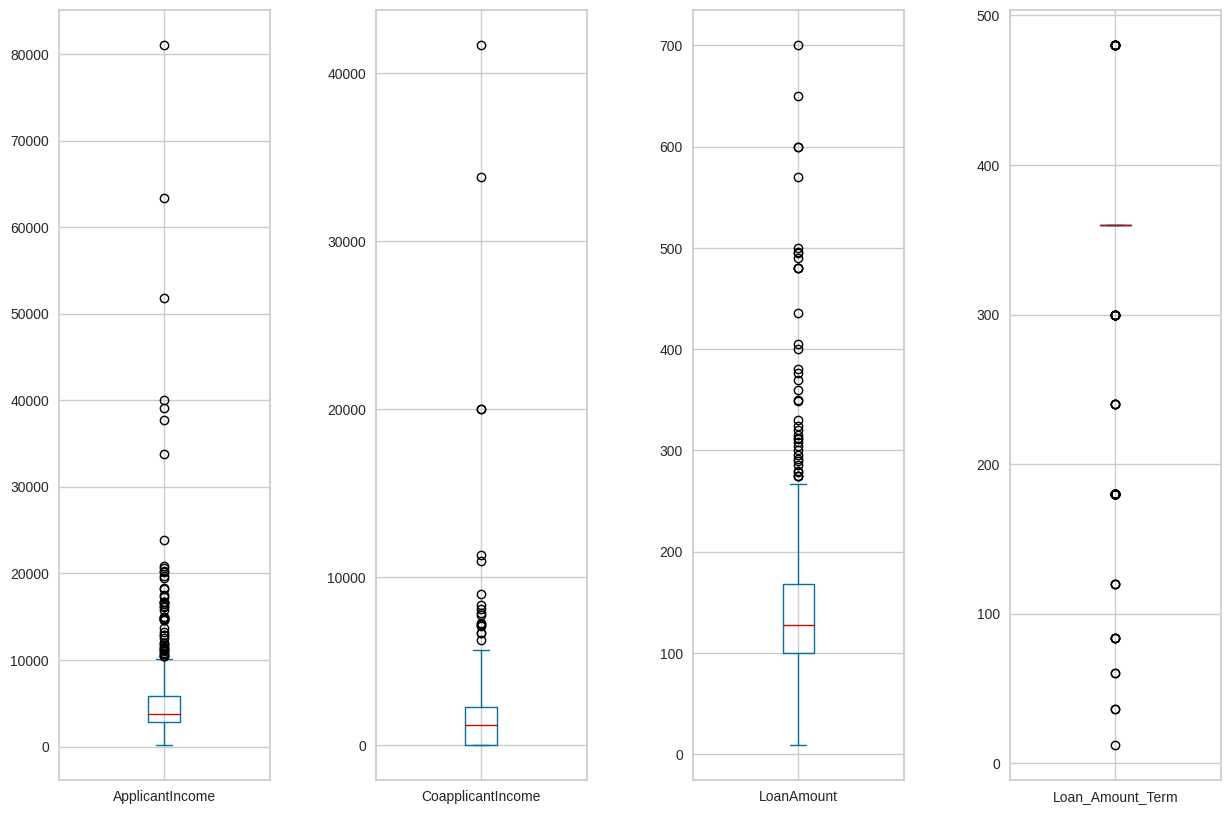

In [90]:
#boxplots showing outliers
#fig = px.box(
    #df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]],points="outliers" )
#fig.show()

df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 10)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()


<Axes: xlabel='Credit_History', ylabel='count'>

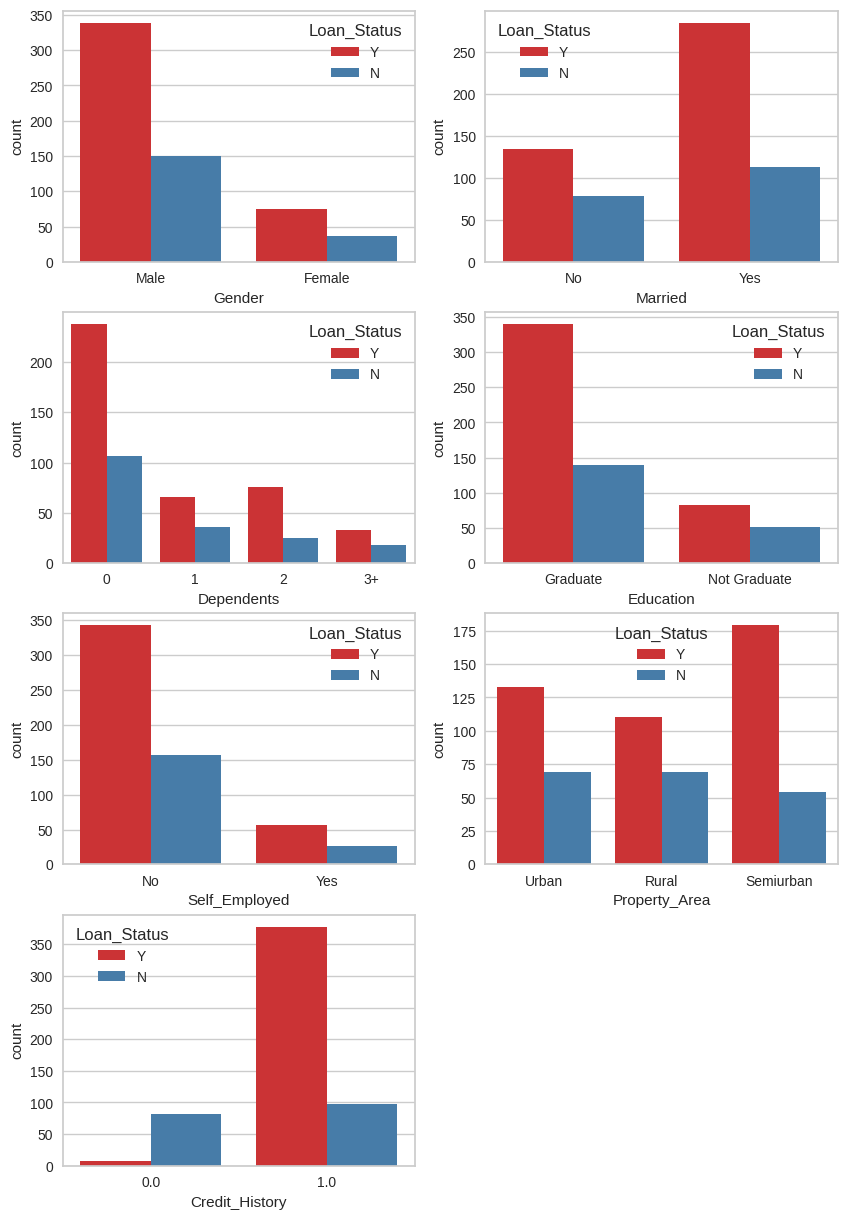

In [91]:
#bivariate analysis and visualizations
plt.figure(figsize = (10,15))
plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set1', data = df)
plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set1', data = df)


<Axes: >

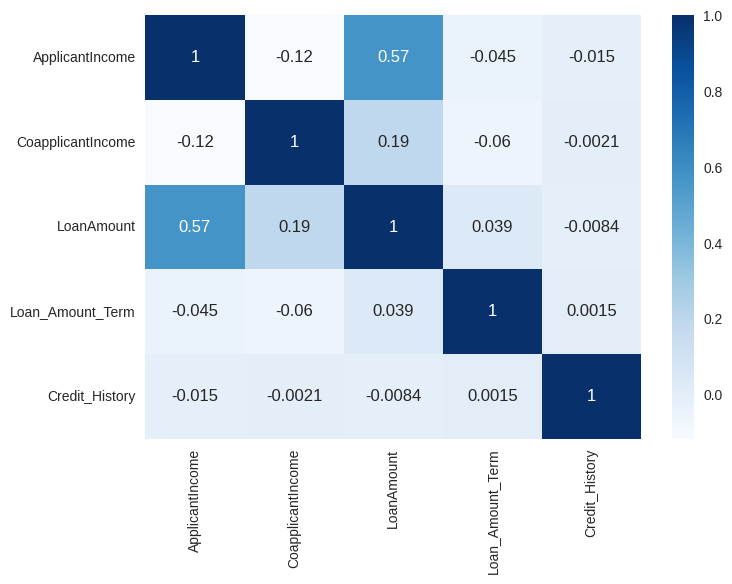

In [93]:
corr = df.corr()
sns.heatmap(corr,cmap="Blues",annot=True)

In [94]:
#dealing with missing values

df.isnull().sum()

#here we can see that some categorical and numerical variables have null values. lets visualize them so we can know which statistic to use for imputation. but first in order to plot the null values along with other values we need to fill in missing values with "NA"

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

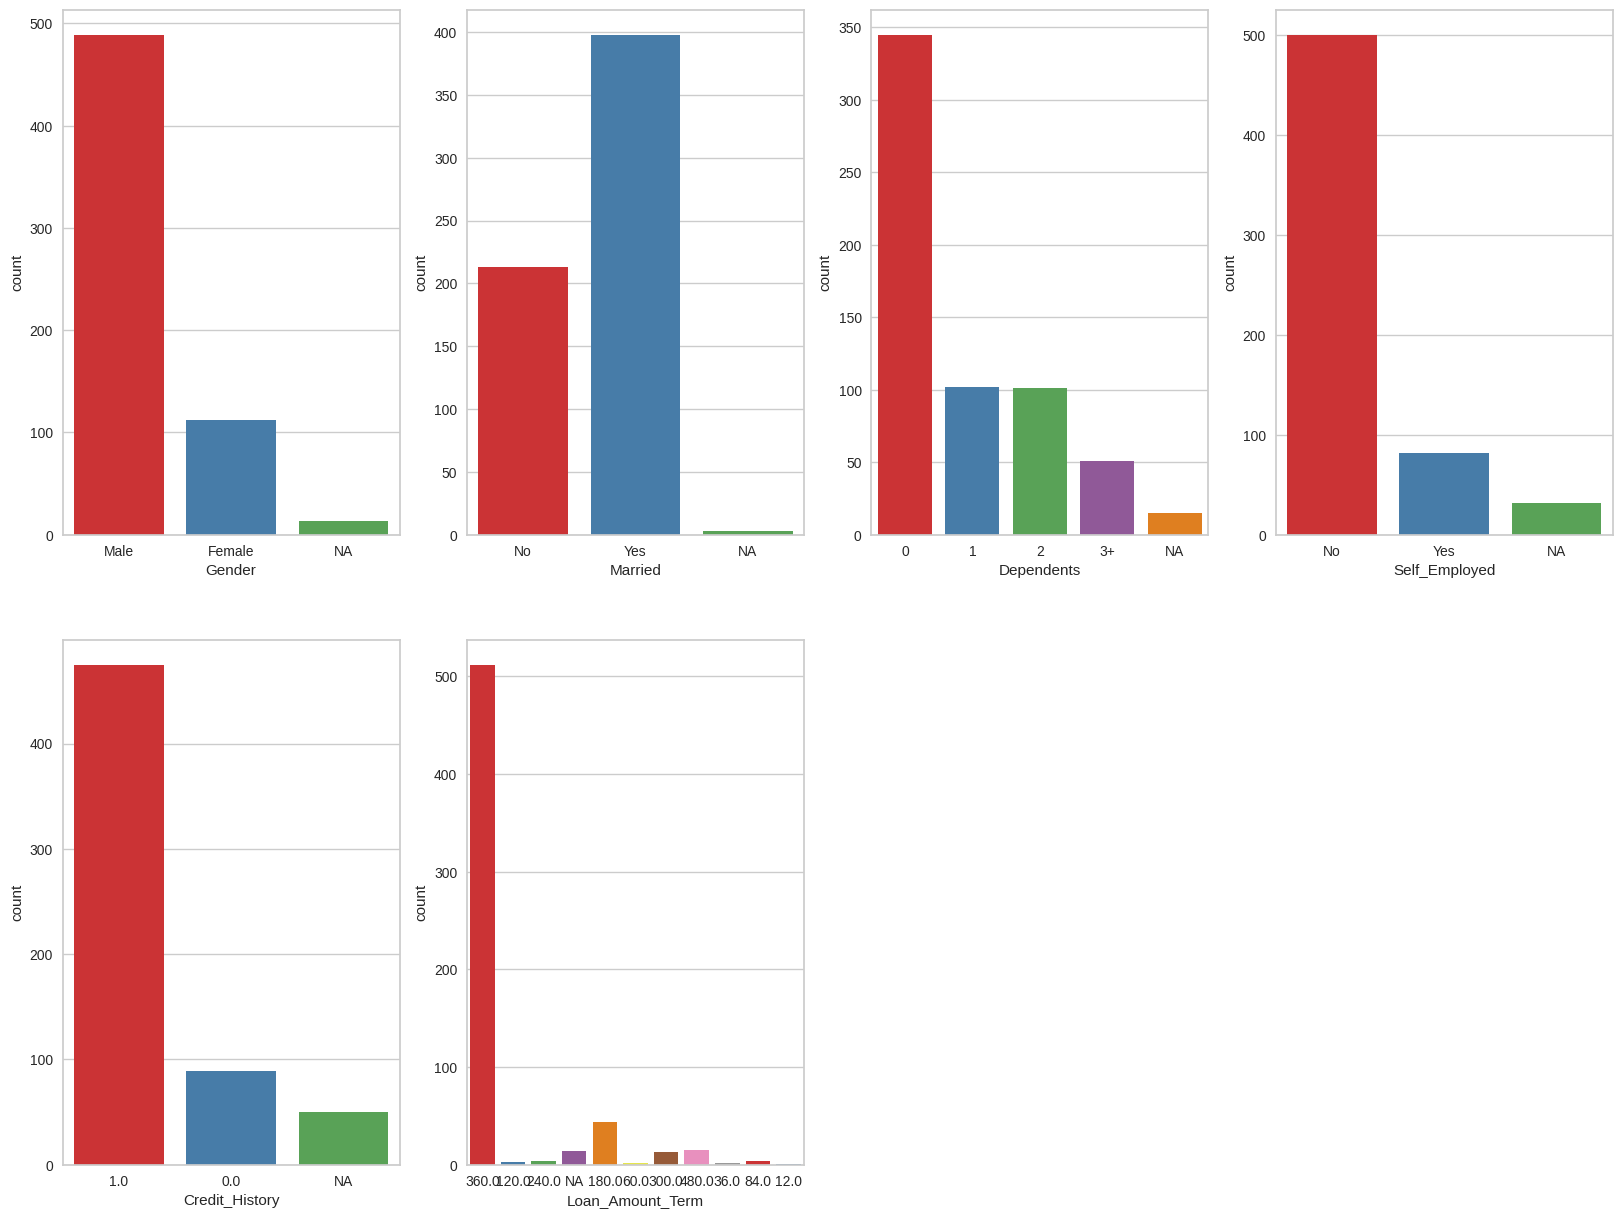

In [95]:
df_copy = df.fillna("NA")
plt.figure(figsize = (20,15))
plt.subplot(2,4,1)
sns.countplot(x = 'Gender', palette = 'Set1', data = df_copy)
plt.subplot(2,4,2)
sns.countplot(x = 'Married', palette = 'Set1', data = df_copy)
plt.subplot(2,4,3)
sns.countplot(x = 'Dependents', palette = 'Set1', data = df_copy)
plt.subplot(2,4,4)
sns.countplot(x = 'Self_Employed', palette = 'Set1', data = df_copy)
plt.subplot(2,4,5)
sns.countplot(x = 'Credit_History', palette = 'Set1', data = df_copy)
plt.subplot(2,4,6)
sns.countplot(x = 'Loan_Amount_Term', palette = 'Set1', data = df_copy)

#the visualizations show that these missing values in the categorical variables can be imputed with mode.

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

#for loan_amount we will use median instaed of mean to fill in the missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

#checking any null values

df.isnull().sum()


In [96]:
#now that we donot have any null values, let us deal with the outliers. for that we will be using the IQR(inter quartile range) method. IQR = Q1 = df.quantile(0.25) ,Q3 = df.quantile(0.75), IQR = Q3 - Q1. this is called the capping method. we donot want to us ethe trimmin g method because this will make us loose the data.

AI_Q1 = df['ApplicantIncome'].quantile(0.25)
AI_Q3 = df['ApplicantIncome'].quantile(0.75)
AI_IQR = AI_Q3 - AI_Q1   #interquartile range for ApplicantIncome
AI_UL = AI_Q3 + 1.5 * AI_IQR  #calculating upperlimit for applicantincome
print(AI_UL)
AI_LL = AI_Q1 - 1.5 * AI_IQR  #calculating lower limit for ApplicantIncome

CI_Q1 = df['CoapplicantIncome'].quantile(0.25)
CI_Q3 = df['CoapplicantIncome'].quantile(0.75)
CI_IQR = CI_Q3 - CI_Q1   #interquartile range for ApplicantIncome
CI_UL = CI_Q3 + 1.5 * CI_IQR  #calculating upperlimit for applicantincome
CI_LL = CI_Q1 - 1.5 * CI_IQR  #calculating lower limit for ApplicantIncome


new_df_cap = df.copy()
new_df_cap['ApplicantIncome'] = np.where(
    new_df_cap['ApplicantIncome'] > AI_UL,
    AI_UL,
    np.where(
        new_df_cap['ApplicantIncome'] < AI_LL,
        AI_LL,
        new_df_cap['ApplicantIncome']
    )
)
new_df_cap['CoapplicantIncome'] = np.where(
    new_df_cap['CoapplicantIncome'] > CI_UL,
    CI_UL,
    np.where(
        new_df_cap['CoapplicantIncome'] < CI_LL,
        CI_LL,
        new_df_cap['CoapplicantIncome']
    )
)
fig = px.box(
    new_df_cap[["ApplicantIncome", "CoapplicantIncome"]] )
fig.show()


10171.25


In [97]:
df = df.drop('Loan_ID', axis = 1) #removing the Loan_ID variable because it is of no use
df = pd.get_dummies(df)  #we are using one-hot encoding for converting categorical variables. we are not using label encoder because label encoder encodes in a 0,1,2,3,4,5... way which often leads to a hierarachy form of categories. in order to avoid this we are using onehot encoding.
# Dropping extra columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Renaming columns
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)


In [98]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


Text(0, 0.5, 'Total')

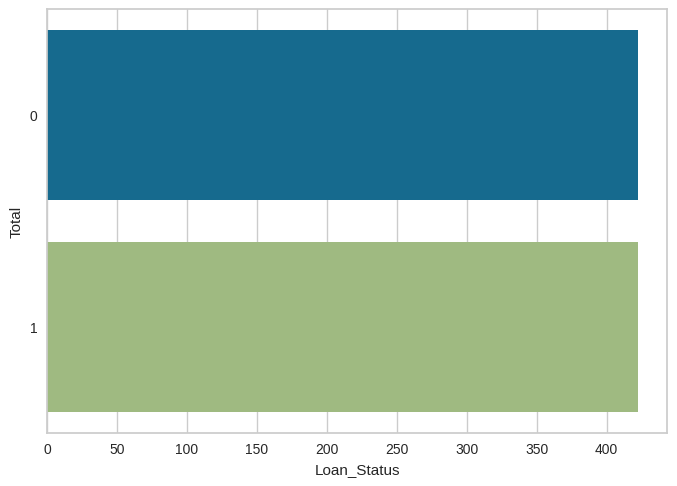

In [99]:
#from our univariate analysis we have seen that this datset is an imbalanced dataset. we  will use the SMOTE technique to oversample our dataset.
#first separating the target variable from independent variables
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)
sns.countplot(y=y, data=df)
plt.xlabel('Loan_Status')
plt.ylabel('Total')

In [100]:
X.index.size #we can see that by using SMOTE, it has resampled our dataset from 614 to 844 entries generating random row data to eliminate our issue of class imbalance

844

In [101]:
from sklearn.model_selection import train_test_split #splitting our dataset into training and test set with 9:1 % ratio.
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.1)  #X_train has a count of 759 while x_cv has a count of 85 rows.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [107]:
pred_cv1 = model1.predict(x_cv)
accuracy_score(y_cv,pred_cv1)

0.8117647058823529

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=10
kf1 = KFold(n_splits=k, random_state=1, shuffle=True)
scores = cross_val_score(model1, X, y, scoring='accuracy', cv=kf1)
for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
print('Accuracy: %.3f, Standard Deviation: %.3f' % (np.mean(scores)*100, np.std(scores)))

#we can see here that by running cross fold validation we have increased the accuracy from 71.7% to 80.457 %

Fold Number: 0, Accuracy: 0.729
Fold Number: 1, Accuracy: 0.824
Fold Number: 2, Accuracy: 0.741
Fold Number: 3, Accuracy: 0.729
Fold Number: 4, Accuracy: 0.881
Fold Number: 5, Accuracy: 0.655
Fold Number: 6, Accuracy: 0.786
Fold Number: 7, Accuracy: 0.810
Fold Number: 8, Accuracy: 0.845
Fold Number: 9, Accuracy: 0.845
Accuracy: 78.450, Standard Deviation: 0.066


In [112]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(random_state=1)
model2.fit(x_train,y_train)
pred_cv2 = model2.predict(x_cv)
accuracy_score(y_cv,pred_cv2)


0.8117647058823529

In [118]:

k=10
kf2 = KFold(n_splits=k, random_state=1, shuffle=True)
scores = cross_val_score(model2, X, y, scoring='accuracy', cv=kf2)
for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
print('Accuracy: %.3f, Standard Deviation: %.3f' % (np.mean(scores)*100, np.std(scores)))

Fold Number: 0, Accuracy: 0.847
Fold Number: 1, Accuracy: 0.847
Fold Number: 2, Accuracy: 0.765
Fold Number: 3, Accuracy: 0.729
Fold Number: 4, Accuracy: 0.857
Fold Number: 5, Accuracy: 0.810
Fold Number: 6, Accuracy: 0.881
Fold Number: 7, Accuracy: 0.738
Fold Number: 8, Accuracy: 0.750
Fold Number: 9, Accuracy: 0.821
Accuracy: 80.454, Standard Deviation: 0.052
